# **Random Forest**

## *Data Import*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("penguins.csv")

## *About Data*

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
culmen_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [7]:
df.dropna(inplace= True)

In [8]:
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [9]:
df["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [10]:
df["sex"].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [11]:
df = df[df["sex"] != "."]

## *Train Test Split*

In [12]:
X = pd.get_dummies(df.drop("species", axis=1), drop_first= True)
y = df["species"]

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 9)

## *Random Forest Model*

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
random_forest = RandomForestClassifier(n_estimators= 100, max_features= "sqrt", random_state= 9)

In [29]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=9)

In [30]:
prediction = random_forest.predict(X_test)

## *Performance*

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

In [32]:
confusion_matrix(y_test, prediction)

array([[44,  1,  1],
       [ 0, 23,  0],
       [ 0,  0, 31]])

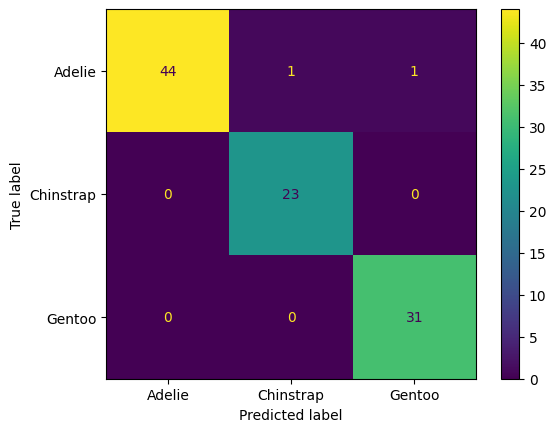

In [33]:
ConfusionMatrixDisplay.from_estimator(random_forest, X_test, y_test)

In [34]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

      Adelie       1.00      0.96      0.98        46
   Chinstrap       0.96      1.00      0.98        23
      Gentoo       0.97      1.00      0.98        31

    accuracy                           0.98       100
   macro avg       0.98      0.99      0.98       100
weighted avg       0.98      0.98      0.98       100



In [53]:
error = []

for n in range(1, 30):
    model = RandomForestClassifier(n_estimators= n, max_features= "sqrt", random_state= 9)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    error.append(1 - accuracy_score(pred, y_test))

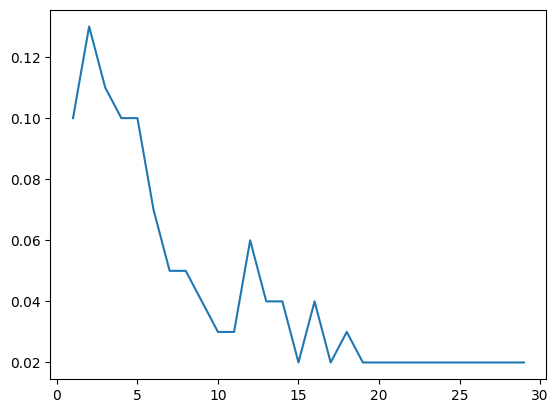

In [54]:
plt.plot(range(1, 30), error)